## 비지도 학습: 머신러닝의 미래
- 입력데이터(X)만 존재, 출력(Y) 없음

In [ ]:
# p221 10개의 숫자 이미지 OCR(Optical 과학 Character 글자 Recognization 인식)
# 비지도 학습으로 숫자 인식을 할 수 있습니다

In [1]:
# p221
from sklearn.datasets import load_digits # digits 숫자

In [2]:
digits = load_digits()

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
digits.target.shape # 예측 목표(타겟)

(1797,)

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
import matplotlib.pyplot as plt

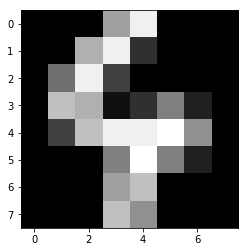

In [9]:
plt.imshow(digits.images[110],cmap='gray')

In [10]:
# p221 
# digits.data.shape -> (1797, 64) 
# 64개의 명암 값을 2개로 차원축소해서 2차원 그래프에 산점도로 그려봅니다

In [18]:
from sklearn.decomposition import PCA
import mglearn

In [13]:
pca = PCA(n_components=2).fit(digits.data)
# .fit() -> 배우는 함수
# 64차원을 2차원으로 축소하여 배워라

In [14]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

In [15]:
pca_x

array([[ -1.25946609,  21.2748828 ],
       [  7.95761189, -20.76870018],
       [  6.99192228,  -9.9559852 ],
       ...,
       [ 10.8012834 ,  -6.96025185],
       [ -4.87209915,  12.42395242],
       [ -0.34439008,   6.36555027]])

In [16]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

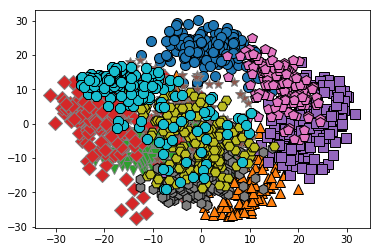

In [21]:
l = mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], digits.target)

In [22]:
# p223
from sklearn.manifold import TSNE

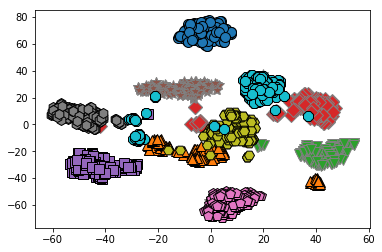

In [25]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], digits.target)

### p225 군집(clustering) - 분류, 이상치 검출(Abnormal Detection)
- k 평균 군집
- 병합 군집
- DBSCAN (Density based spatial clusterng Application Noise) 밀도가 높은 공간

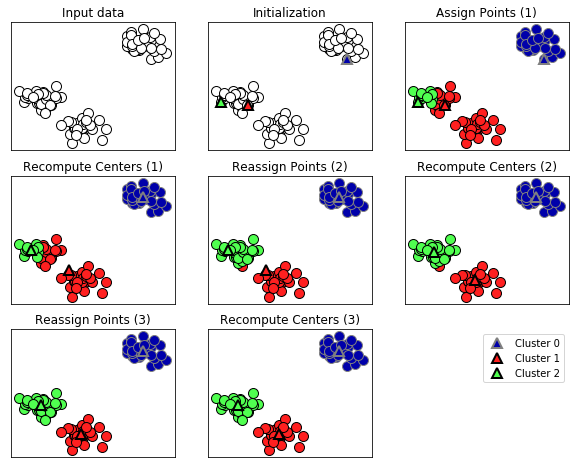

In [26]:
mglearn.plots.plot_kmeans_algorithm()

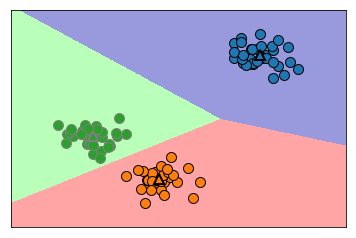

In [27]:
mglearn.plots.plot_kmeans_boundaries()

In [36]:
from sklearn.datasets import make_blobs
x, y = make_blobs() # 연습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [37]:
y

array([2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1,
       0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2])

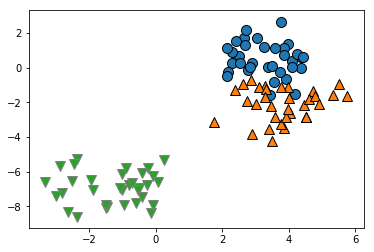

In [38]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], y)
# 초기값이 어디에 찍히는지에 따라 모양이 매번 달라질 수 있다.

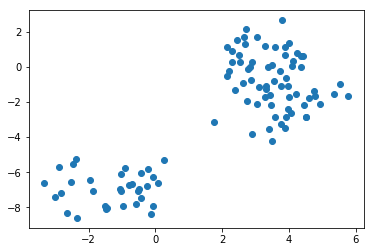

In [39]:
l = plt.scatter(x[:,0], x[:,1])

In [40]:
from sklearn.cluster import KMeans

In [42]:
km = KMeans(n_clusters=3).fit(x)  # x를 3개로 나눠줘(그룹화 clustering)

In [45]:
km.predict(x) # x 가 몇번째 그룹인지 예측

array([0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0])

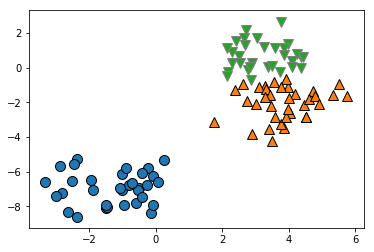

In [46]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], km.predict(x))
# 아래 예측 결과가 l = mglearn.discrete_scatter(x[:,0], x[:,1], y) 실제와 동일한 결과 출력

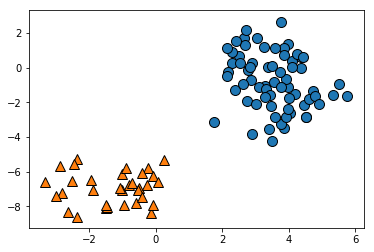

In [49]:
km1 = KMeans(n_clusters=2).fit(x)  # x를 2개로 나눠줘(그룹화 clustering)
l = mglearn.discrete_scatter(x[:,0], x[:,1], km1.predict(x))

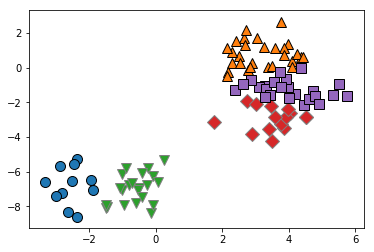

In [50]:
km5 = KMeans(n_clusters=5).fit(x)  # x를 2개로 나눠줘(그룹화 clustering)
l = mglearn.discrete_scatter(x[:,0], x[:,1], km5.predict(x))

### digits 에 적용해보자
- t-SNE로 2개의 차원으로 축소
- 데이터를 K-Means에 fit( k = 10)
- K-Means 의 예측을 산점도에 표시

In [53]:
pca = PCA(n_components=2).fit(digits.data)
# .fit() -> 배우는 함수
# 64차원을 2차원으로 축소하여 배워라

In [55]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

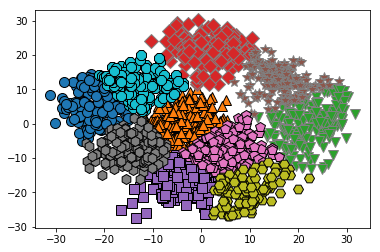

In [62]:
pca_km = KMeans(n_clusters=10).fit(pca_x)
#pca_km.predict(pca_x)
l = mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], pca_km.predict(pca_x))

#### ========================================================================

In [60]:
from sklearn.manifold import TSNE
digits_tsne = TSNE().fit_transform(digits_data)

NameError: name 'digits_data' is not defined

In [ ]:
km = KMeans(n_clusters=10).fit(digits_tsne)

In [ ]:
predict_group = km.predict(digits_tsne)

In [ ]:
l = mglearn.discrete_scatter(digits_tsnex[:,0], digits_tsne[:,1], predict_group)

### ========================================================================

#### 한국 프로야구 10개 팀 클러스터링

In [63]:
import pandas as pd
url = 'http://www.kbreport.com/main'
url = 'KBReport _ 한국 프로야구 통계 사이트.html'  # 다른 이름으로 저장
tables = pd.read_html(url)
len(tables)

7

In [64]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [66]:
baseball = tables[0]
baseball

,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [69]:
# baseball = baseball.set_indexn('팀명', inplace = True) # return 없이 자체적으로 바꾸기
base = baseball.set_index('팀명')

In [73]:
data = base.drop(columns='연속')
data

,순위,승,무,패,승률,게임차,득점,실점
팀명,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342
두산,2,54,0,36,0.600,6.0,440,346
Hero,3,54,0,37,0.593,6.5,500,387
LG,4,49,1,38,0.563,9.5,377,377
NC,5,42,1,44,0.488,16.0,409,415
KT,6,42,1,47,0.472,17.5,407,456
삼성,7,37,1,49,0.430,21.0,400,424
KIA,8,36,1,52,0.409,23.0,401,467
한화,9,34,0,53,0.391,24.5,388,449


In [74]:
data.shape # 8차원이기 때문에 2차원으로 클러스터링

(10, 8)

In [91]:
#2차원으로 변환한 후 k개로 클러스터링
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [92]:
data_pca

array([[-82.63008057,  -6.26201171],
       [-76.0355584 ,  -5.68865172],
       [-61.14104127,  65.40622928],
       [-23.55138709, -52.17586524],
       [  1.57645744,  -8.19581479],
       [ 39.6385485 ,   5.61816139],
       [ 15.20972192, -13.12994716],
       [ 54.18601309,   4.19859093],
       [ 43.57464041, -14.7038801 ],
       [ 89.17268597,  24.93318911]])

In [93]:
# K-means로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

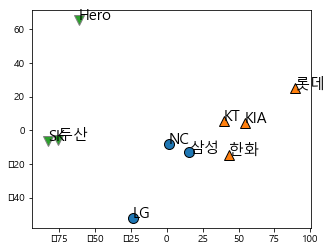

In [98]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,4))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict={'size':15})
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)

### ========================================================================